In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
allmut = pd.read_csv('./data/allmut_nemu.csv')

In [87]:
allmut.head()

,Mut,Label,PosInGene,PosInCodon,RefCodon,AltCodon,RefAa,AltAa,ProbaRef,ProbaMut,ProbaFull,RefNode,AltNode,Gene,taxid,Type,taxname,df,virusname,mut
0,A[G>A]A,0,29,2,AGA,AAA,R,K,0.316040,0.301881,0.301881,Node1,Node2,1,10407,ds,Hepatitis B virus,nemu,HBV,G>A
1,G[A>C]G,1,724,1,AGG,CGG,R,R,0.515888,0.347033,0.347033,Node1,Node2,1,10407,ds,Hepatitis B virus,nemu,HBV,A>C
2,G[C>T]C,0,773,2,GCC,GTC,A,V,0.645726,0.321229,0.321229,Node1,Node2,1,10407,ds,Hepatitis B virus,nemu,HBV,C>T
3,A[G>A]C,0,776,2,AGC,AAC,S,N,0.657652,0.314946,0.314946,Node1,Node2,1,10407,ds,Hepatitis B virus,nemu,HBV,G>A
4,C[A>G]C,0,797,2,CAC,CGC,H,R,0.574844,0.342262,0.342262,Node1,Node2,1,10407,ds,Hepatitis B virus,nemu,HBV,A>G


In [79]:
allmut['mut'] = allmut['Mut'].str.split('[', expand=True)[1].str.split(']', expand=True)[0]

In [80]:
allmut

,Mut,Label,PosInGene,PosInCodon,RefCodon,AltCodon,RefAa,AltAa,ProbaRef,ProbaMut,ProbaFull,RefNode,AltNode,Gene,taxid,Type,taxname,df,virusname,mut
0,A[G>A]A,0,29,2,AGA,AAA,R,K,0.316040,0.301881,0.301881,Node1,Node2,1,10407,ds,Hepatitis B virus,nemu,HBV,G>A
1,G[A>C]G,1,724,1,AGG,CGG,R,R,0.515888,0.347033,0.347033,Node1,Node2,1,10407,ds,Hepatitis B virus,nemu,HBV,A>C
2,G[C>T]C,0,773,2,GCC,GTC,A,V,0.645726,0.321229,0.321229,Node1,Node2,1,10407,ds,Hepatitis B virus,nemu,HBV,C>T
3,A[G>A]C,0,776,2,AGC,AAC,S,N,0.657652,0.314946,0.314946,Node1,Node2,1,10407,ds,Hepatitis B virus,nemu,HBV,G>A
4,C[A>G]C,0,797,2,CAC,CGC,H,R,0.574844,0.342262,0.342262,Node1,Node2,1,10407,ds,Hepatitis B virus,nemu,HBV,A>G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594247,T[C>T]G,1,1542,3,ATC,ATT,I,I,0.998150,0.998150,0.998150,Node11,RN_9,1,77763,ds,Banna virus,nemu,BAV,C>T
594248,A[G>A]T,1,1884,3,CAG,CAA,Q,Q,0.999200,0.999200,0.999200,Node11,RN_9,1,77763,ds,Banna virus,nemu,BAV,G>A
594249,T[G>A]A,2,2010,3,GTG,GTA,V,V,0.997920,0.997920,0.997920,Node11,RN_9,1,77763,ds,Banna virus,nemu,BAV,G>A
594250,G[T>C]C,0,2531,2,GTC,GCC,V,A,0.998920,0.998920,0.998920,Node11,RN_9,1,77763,ds,Banna virus,nemu,BAV,T>C


In [86]:
# nonsyn mutations on label 0
# allmut[allmut['Label'] == 0]

In [102]:
nonsynmut_count = allmut[allmut['Label'] == 0]\
                    .groupby(['Type', 'virusname']) \
                    .agg({'Mut':'count'}) \
                    .reset_index() \
                    .rename(columns={'Mut':'nonsyn_count'})
nonsynmut_count

,Type,virusname,nonsyn_count
0,+,ACoV,8300
1,+,CTV,2281
2,+,DWV,1758
3,+,FMDV,2976
4,+,HAV,1171
5,+,HCV,6189
6,+,HEV,5956
7,+,HGV,1945
8,+,PEDV,1470
9,+,PRRSV,4961


Text(0.5, 1.0, 'Number of nonsynonymous mutation in viruses')

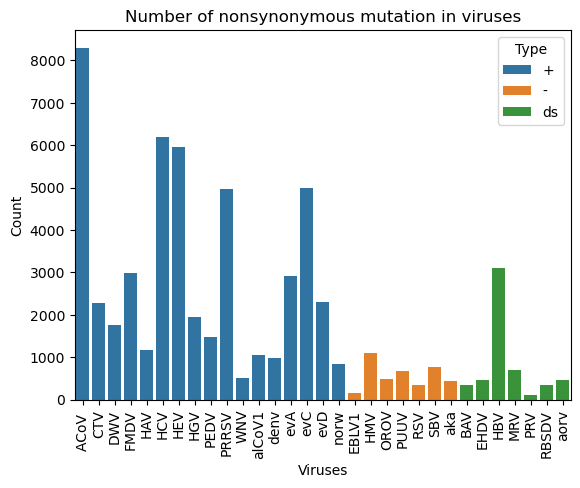

In [103]:
fig, ax = plt.subplots()
g = sns.barplot(data=nonsynmut_count, x='virusname', y='nonsyn_count', hue='Type')

ax.tick_params(axis='x', rotation=90)

ax.set_xlabel('Viruses')
ax.set_ylabel('Count')
ax.set_title('Number of nonsynonymous mutation in viruses')

# fig.tight_layout()

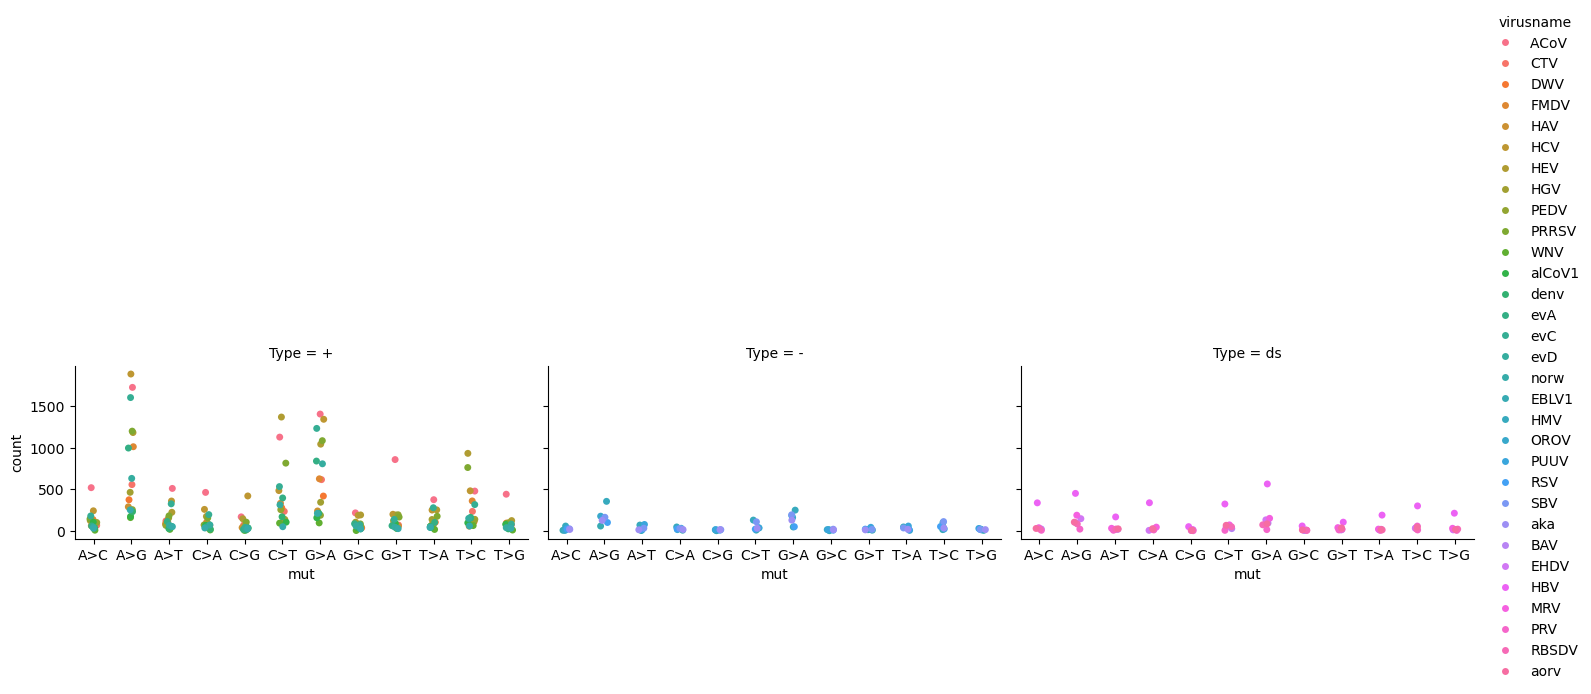

In [47]:
sns.catplot(data=nonsynmut_count, x='mut', y='count', hue='virusname', col='Type')

In [106]:
mutation_count = nonsynmut_count.merge(allmut[allmut['Label'] > 0] \
                                                   .groupby(['Type', 'virusname']) \
                                                   .agg({'mut':'count'}) \
                                                   .reset_index() \
                                                   .rename(columns={'mut':'syn_count'}))
mutation_count['dN/dS'] = mutation_count['nonsyn_count']/mutation_count['syn_count']
mutation_count

,Type,virusname,nonsyn_count,syn_count,dN/dS
0,+,ACoV,8300,52229,0.158916
1,+,CTV,2281,5747,0.396903
2,+,DWV,1758,14711,0.119502
3,+,FMDV,2976,16632,0.178932
4,+,HAV,1171,17460,0.067068
5,+,HCV,6189,27267,0.226978
6,+,HEV,5956,93125,0.063957
7,+,HGV,1945,51733,0.037597
8,+,PEDV,1470,5273,0.278779
9,+,PRRSV,4961,8695,0.570558


Text(0.5, 1.0, 'dN/dS ratio in viruses')

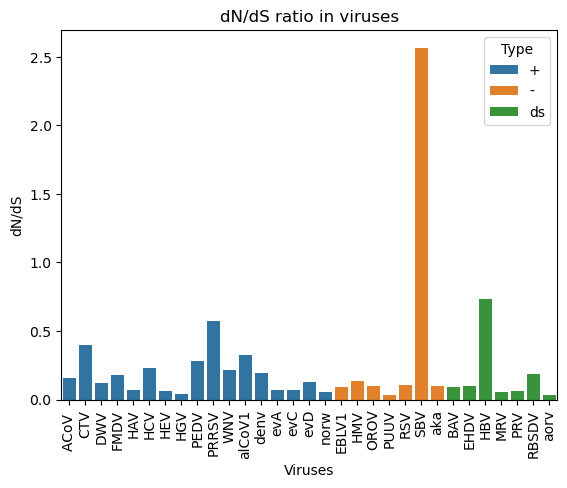

In [107]:
fig, ax = plt.subplots()
g = sns.barplot(data=mutation_count, x='virusname', y='dN/dS', hue='Type')

ax.tick_params(axis='x', rotation=90)

ax.set_xlabel('Viruses')
ax.set_ylabel('dN/dS')
ax.set_title('dN/dS ratio in viruses')